In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Understanding the Data

In [2]:
raw_data=pd.read_csv('diabetes_prediction_dataset.csv')
raw_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
raw_data.shape

(100000, 9)

In [4]:
raw_data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
raw_data['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [6]:
raw_data.groupby('gender')['diabetes'].sum()

gender
Female    4461
Male      4039
Other        0
Name: diabetes, dtype: int64

In [7]:
raw_data['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [8]:
raw_data['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

Visualising the Data

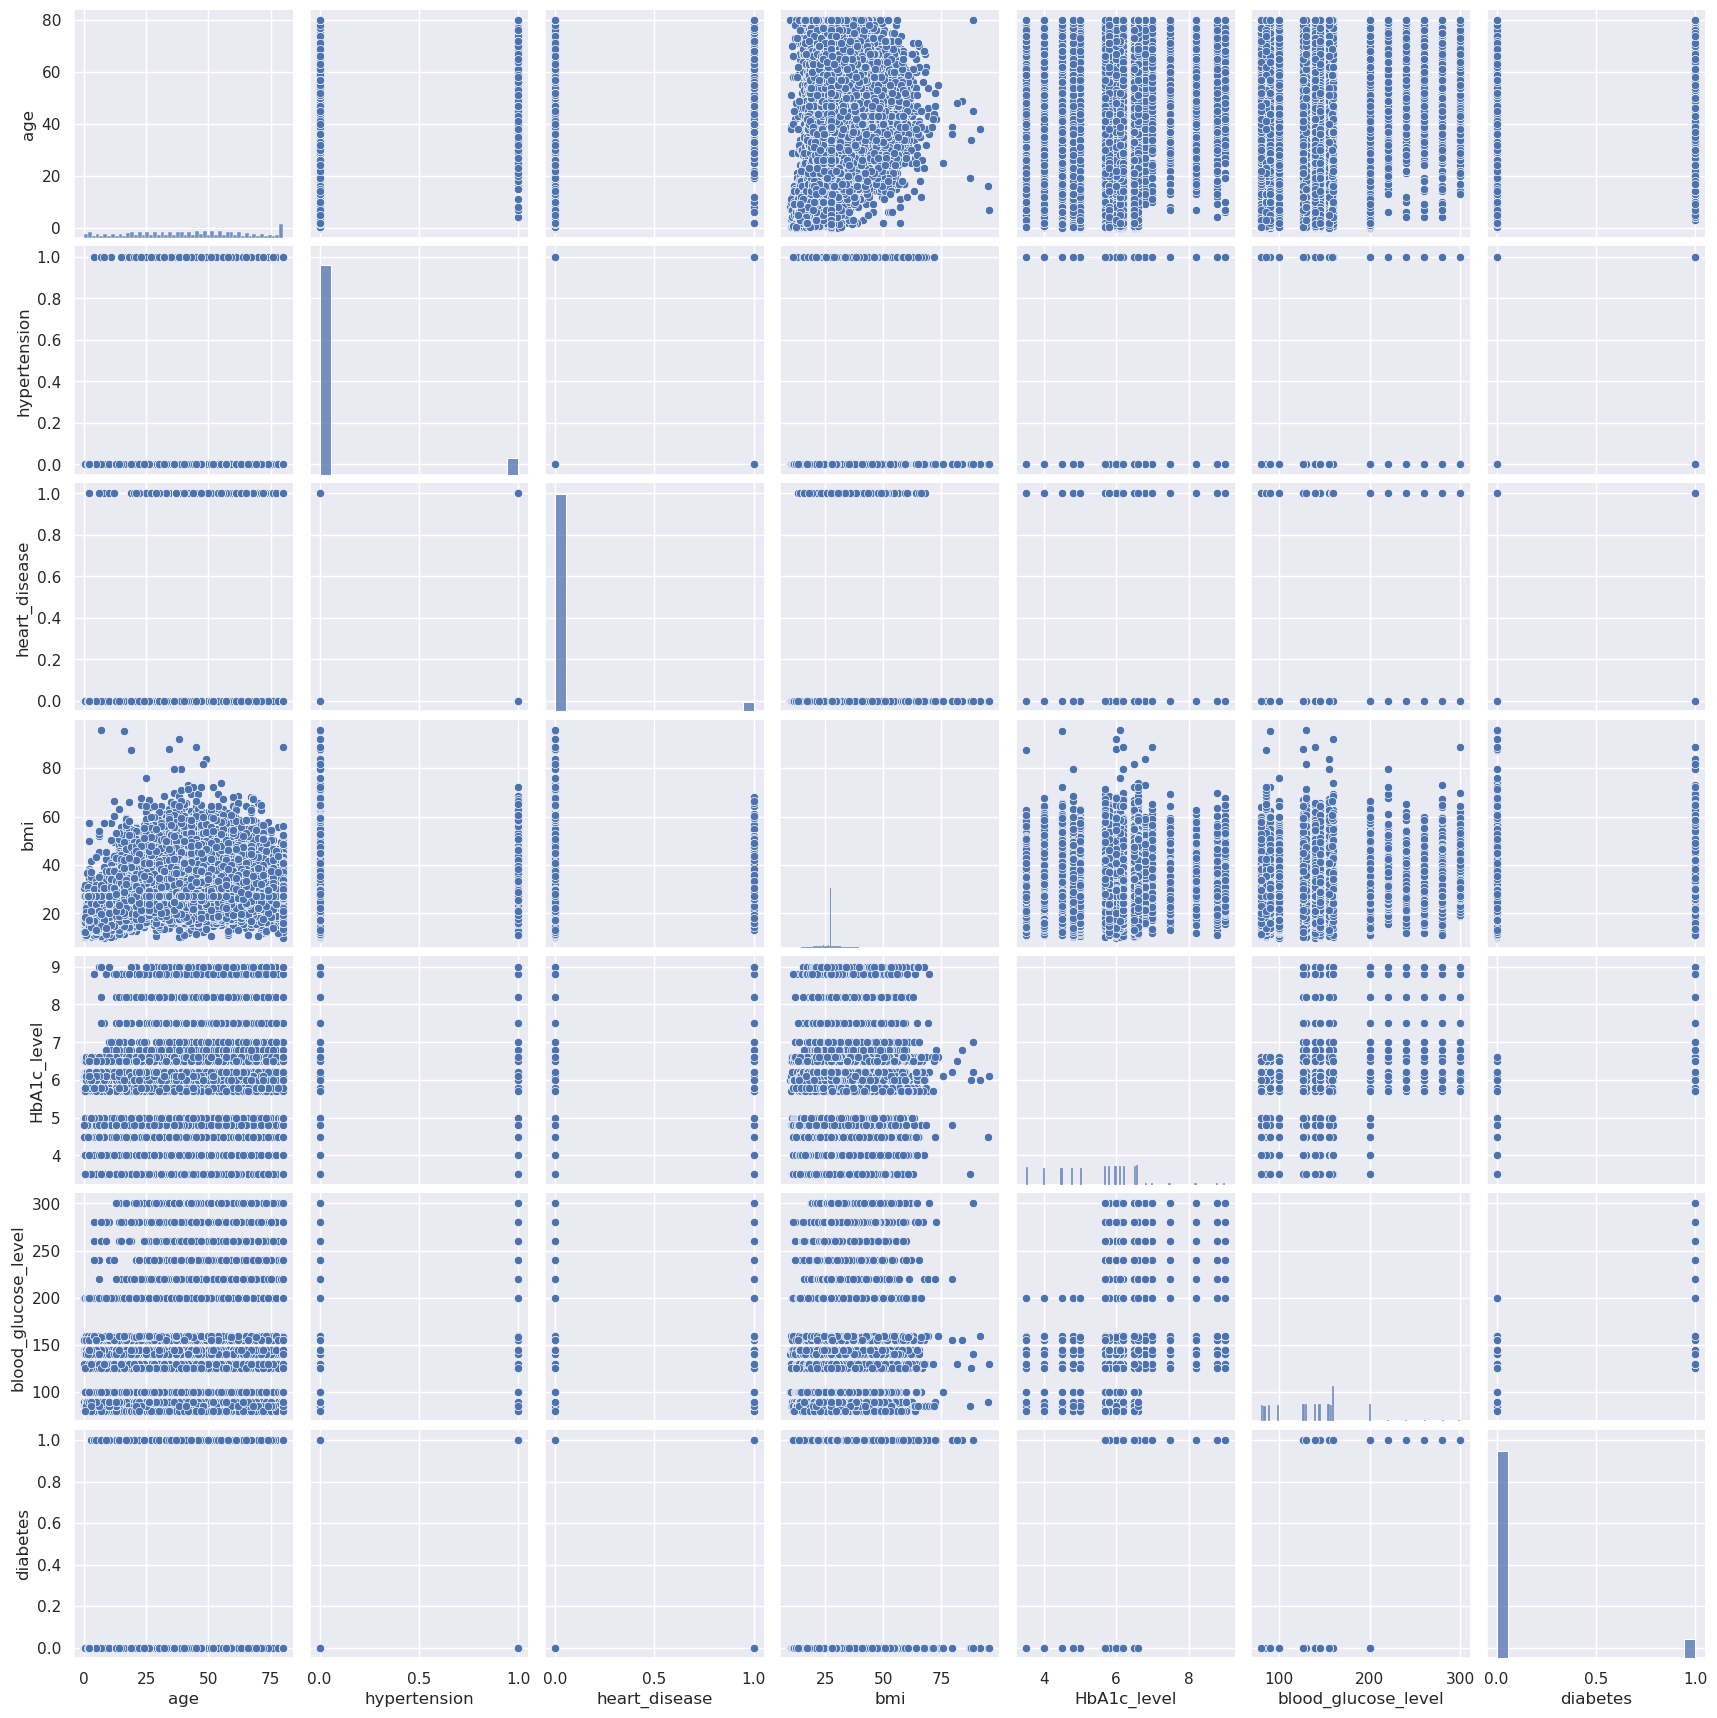

In [9]:
sns.pairplot(raw_data)

Making Data Easier To Process

In [10]:
raw_data['smoking_history']=raw_data['smoking_history'].map({'No Info':0, 'never':1, 'former':2, 'current':3, 'not current':4, 'ever':5})
raw_data['gender']=raw_data['gender'].map({'Female':0, 'Male':1, 'Other':2})
raw_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,1,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,1,27.32,5.7,158,0
3,0,36.0,0,0,3,23.45,5.0,155,0
4,1,76.0,1,1,3,20.14,4.8,155,0


In [11]:
raw_data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Splitting data into testing data and training data

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [19]:
inputs=raw_data[['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'smoking_history', 'HbA1c_level', 'blood_glucose_level']]
target=raw_data['diabetes']

In [20]:
x_train, x_test, y_train, y_test=train_test_split(inputs, target, test_size=0.2, random_state=365)

In [21]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [22]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [23]:
pred_log=log_reg.predict(x_test)

In [25]:
metrics.confusion_matrix(y_test, pred_log)

array([[18154,   167],
       [  675,  1004]])

In [26]:
acc_LR=metrics.accuracy_score(y_test, pred_log)
acc_LR

0.9579

In [27]:
print(metrics.classification_report(y_test, pred_log))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18321
           1       0.86      0.60      0.70      1679

    accuracy                           0.96     20000
   macro avg       0.91      0.79      0.84     20000
weighted avg       0.96      0.96      0.95     20000

